In [2]:
pip install ktrain

     |████████████████████████████████| 25.2MB 131kB/s 
     |████████████████████████████████| 421.8MB 31kB/s 
     |████████████████████████████████| 983kB 34.8MB/s 
     |████████████████████████████████| 245kB 40.2MB/s 
     |████████████████████████████████| 573kB 35.0MB/s 
     |████████████████████████████████| 471kB 31.8MB/s 
     |████████████████████████████████| 3.9MB 39.3MB/s 
     |████████████████████████████████| 450kB 40.8MB/s 
     |████████████████████████████████| 1.0MB 32.5MB/s 
     |████████████████████████████████| 3.7MB 41.0MB/s 
     |████████████████████████████████| 890kB 34.6MB/s 
  Created wheel for ktrain: filename=ktrain-0.14.4-cp36-none-any.whl size=25240036 sha256=a47bae6de87a2ac42da754403873e1fb5acc706e8c6da6d6106d7db085aa51a2
  Stored in directory: /root/.cache/pip/wheels/b5/2d/37/207f9c8b76954131d23f03704cbd77e63f0251a580bab7002b
  Created wheel for keras-bert: filename=keras_bert-0.81.0-cp36-none-any.whl size=37913 sha256=9da2c3464a68bac538e20fa12f4

In [22]:
pip install -U setuptools

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (46.1.3)


In [23]:
pip install urlparse4

  Using cached https://files.pythonhosted.org/packages/af/6f/a2d1a397b47ce3af6c5bb8936a7a8f930bf29b4df42081da842c5c84c1d1/urlparse4-0.1.3.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [3]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
import os
import csv
import numpy as np
import pandas as pd
import re
import string
from numpy.random import RandomState
import urllib.parse
import ktrain
from ktrain import text as txt
import tensorflow as tf
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
TRAIN_DATA_FILE = "training_data.csv"
TEST_DATA_FILE="test_final.csv"

In [0]:
train_data=pd.read_csv(TRAIN_DATA_FILE)
test_data=pd.read_csv(TEST_DATA_FILE)

In [0]:
def url_parser(string):
  new_string = ''
  for i in string.split():
     s, n, p, pa, q, f = urllib.parse.urlparse(i)
     if s and n:
         pass
     elif i[:1] == '@':
         pass
     elif i[:1] == '#':
         new_string = new_string.strip() + ' ' + i[1:]
     else:
         new_string = new_string.strip() + ' ' + i
  return new_string

In [0]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [9]:
corpus=[]
from tqdm import tqdm
for i in tqdm(range(0,train_data.shape[0])):
    text=train_data['text'][i]
    text=url_parser(text)
    #print(text)
    text=re.sub('[^a-zA-Z]',' ',text)
    #print(text)
    text=re.sub(r"http\S+", "", text)
    #print(text)
    text=text.lower()
    #print(text)
    text=emoji_pattern.sub(r'', text)
    #print(text)
    text=text.split()
    #print(text)
    lemmatizer = WordNetLemmatizer()
    text=[lemmatizer.lemmatize(word,pos ="a") for word in text if not word in set(stopwords.words('english'))]
    #print(text)
    #ps=PorterStemmer()
    #text=[ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    #print(text)
    text=' '.join(text)
    #print(text)
    corpus.append(text)

100%|██████████| 5266/5266 [00:22<00:00, 238.41it/s]


In [10]:
corpus_test=[]
from tqdm import tqdm
for i in tqdm(range(0,test_data.shape[0])):
    text=test_data['text'][i]
    text=url_parser(text)
    #print(text)
    text=re.sub('[^a-zA-Z]',' ',text)
    #print(text)
    text=re.sub(r"http\S+", "", text)
    #print(text)
    text=text.lower()
    #print(text)
    text=emoji_pattern.sub(r'', text)
    #print(text)
    text=text.split()
    #print(text)
    lemmatizer = WordNetLemmatizer()
    text=[lemmatizer.lemmatize(word,pos ="a") for word in text if not word in set(stopwords.words('english'))]
    #print(text)
    #ps=PorterStemmer()
    #text=[ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    #print(text)
    text=' '.join(text)
    #print(text)
    corpus_test.append(text)

100%|██████████| 1153/1153 [00:05<00:00, 227.64it/s]


In [0]:
train_data['corpus']=corpus

In [18]:
train_data

,text,labels,corpus
0,@realDonaldTrump This is one of the worst time...,0,one bad times american causing serious damage ...
1,How about the crowd in Oval in today's #AUSvIN...,1,crowd oval today ausvind holding balidan badge...
2,@skroskz @shossy2 @JoeBiden Biden &amp; his so...,0,biden amp son hunter took advantage position u...
3,#etsy shop: Benedict Donald so called presiden...,1,etsy shop benedict donald called president tra...
4,@realDonaldTrump Good build a wall around Arka...,0,good build wall around arkansas fucktrump fuck...
...,...,...,...
5261,@ICC should allow ms dhoni to keep glove. It i...,1,allow ms dhoni keep glove attached indian peop...
5262,Trump on avoiding movie pirating: 'of course y...,1,trump avoiding movie pirating course illegally...
5263,I noticed recently Jamie Oliver's restaurants ...,1,noticed recently jamie oliver restaurants clos...
5264,#TeamIndia geared up is okay. What's on the GL...,0,teamindia geared okay glove armed forces allow...


In [20]:
(x_train, y_train), (x_test, y_test), preproc=txt.texts_from_df(train_data,
                                                                 text_column='corpus',
                                                                 label_columns=['labels'],
                                                                 val_pct=0.05,
                                                                 maxlen=150,
                                                                 preprocess_mode='bert')

preprocessing train...
language: en


preprocessing test...
language: en


In [21]:
model = txt.text_classifier('bert', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model,train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=6,)

Is Multi-Label? False
maxlen is 150
done.


In [11]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Train on 4739 samples
Epoch 1/1024
4739/4739 [==============================] - 318s 67ms/sample - loss: 0.6799 - accuracy: 0.5807
Epoch 2/1024
2688/4739 [================>.............] - ETA: 2:08 - loss: 1.1503 - accuracy: 0.5379

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


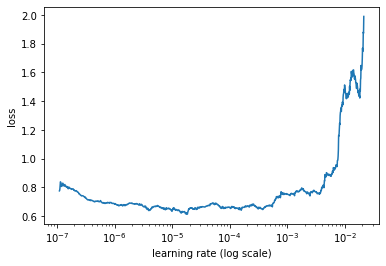

In [12]:
learner.lr_plot()

In [0]:
counter_weight={}
weights=train_data['labels'].value_counts()

for n,wght in enumerate(weights):
    counter_weight[n]=(np.max(weights)/wght)

In [13]:
weights=train_data['labels'].value_counts()
weights

1    3235
0    2031
Name: labels, dtype: int64

In [22]:
learner.fit_onecycle(2e-5, 1)



begin training using onecycle policy with max lr of 2e-05...
Train on 5002 samples, validate on 264 samples
5002/5002 [==============================] - 346s 69ms/sample - loss: 0.6355 - accuracy: 0.6493 - val_loss: 0.5434 - val_accuracy: 0.7348


In [23]:
learner.autofit(2e-5,4,early_stopping=1)



begin training using triangular learning rate policy with max lr of 2e-05...
Train on 5002 samples, validate on 264 samples
Epoch 1/4
5002/5002 [==============================] - 317s 63ms/sample - loss: 0.5563 - accuracy: 0.7165 - val_loss: 0.5526 - val_accuracy: 0.7008
Epoch 2/4
5002/5002 [==============================] - 322s 64ms/sample - loss: 0.4495 - accuracy: 0.7925 - val_loss: 0.5938 - val_accuracy: 0.7083
Epoch 00002: early stopping
Weights from best epoch have been loaded into model.


In [0]:
predictor=ktrain.get_predictor(learner.model,preproc)

In [0]:
data=corpus_test

In [26]:
len(data)

1153

In [27]:
predictions=predictor.predict(data)

In [0]:
pred_df=pd.DataFrame({'labels':predictions})
pred_df.to_csv('submission_final2.csv',index=True)